In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer=load_breast_cancer()

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
df=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler=StandardScaler()

In [10]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
scaled_data=scaler.transform(df)

In [13]:
from sklearn.decomposition import PCA

In [18]:
pca=PCA(n_components=2)

In [19]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
X_pca=pca.transform(scaled_data)

In [21]:
X_pca.shape

(569, 2)

Text(0, 0.5, 'Second pc')

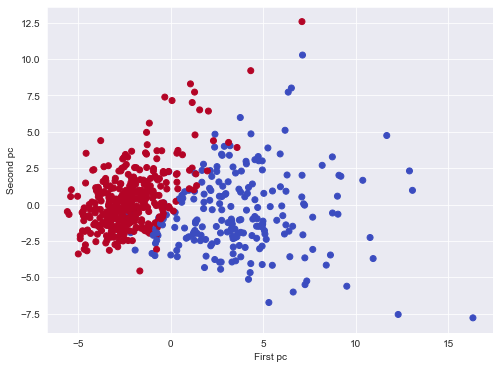

In [34]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=cancer['target'],cmap='coolwarm')
plt.xlabel('First pc')
plt.ylabel('Second pc')

In [35]:
df_comp=pd.DataFrame(pca.components_,columns=cancer['feature_names'])

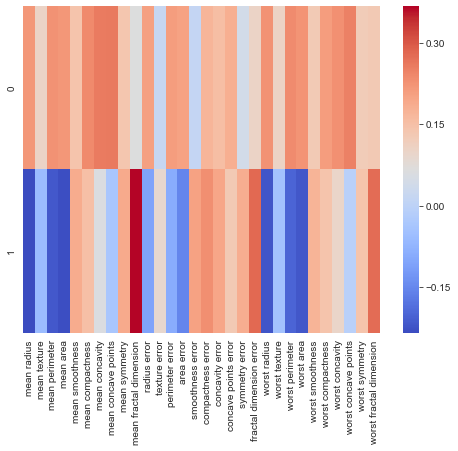

In [37]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
sns.heatmap(df_comp,cmap='coolwarm')

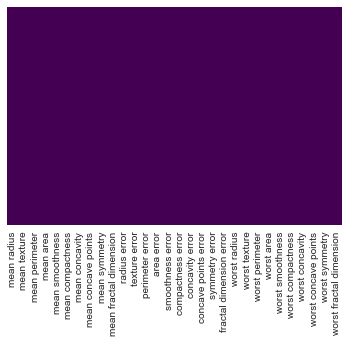

In [41]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [49]:
X=X_pca
y=cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
model=LogisticRegression()

c:\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [51]:
model.fit(X_train,y_train)

c:\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
predictions=model.predict(X_test)

In [53]:
from sklearn.metrics import classification,classification_report,confusion_matrix

In [57]:
print(classification_report(y_test,predictions))
print()
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.97      0.97      0.97       121

   micro avg       0.96      0.96      0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188


[[ 64   3]
 [  4 117]]
